In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

In [2]:
df = pd.read_csv('allTogether.csv')

def myround(x, base=1, dec=1):
    return round(base * round(x/base),dec)

# groupNames, majLabel and colors are synonyms
df = df.drop(['question.groupNames','question.colors'], axis=1)

# add gender-focused version of the cv score (demographic parity)
# S=1 for male personas, S=0 for female personas
df['question.gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='female', 'question.gender_cv'] = 2-df['question.cv']
# S=0 for female personas, S=1 for male personas
df['question.inverse_gender_cv'] = df['question.cv']
df.loc[df['question.majLabel']=='male', 'question.inverse_gender_cv'] = 2-df['question.cv']

# categorial gender-based cv
df['question.cat_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='female', 'question.cat_gender_cv'] = myround(2-df['question.cv'], .2)
# categorial inversed gender-based cv
df['question.cat_inverse_gender_cv'] = myround(df['question.cv'], .2)
df.loc[df['question.majLabel']=='male', 'question.cat_inverse_gender_cv'] = myround(2-df['question.cv'], .2)

# categorial majority-based cv
df['question.cat_cv'] = myround(df['question.cv'], .2)

# categorial inversed majority-based cv
df['question.cat_inverse_cv'] = myround(2-df['question.cv'], .2)

pd.set_option('display.max_columns', None)
df.head()

,_id,rating,inconfidence,secondsElapsed,question.questionType,question.number,question.minSize,question.majSize,question.majLabel,question.tpr,question.tnr,question.bcr,question.accuracy,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.tpr0,question.tnr0,question.bcr0,question.accuracy0,question.adj_tpr0,question.adj_tnr0,question.adj_bcr0,question.adj_accuracy0,question.tpr1,question.tnr1,question.bcr1,question.accuracy1,question.adj_tpr1,question.adj_tnr1,question.adj_bcr1,question.adj_accuracy1,question.s_tpr,question.s_tnr,question.s_bcr,question.s_accuracy,question.s_adj_tpr,question.s_adj_tnr,question.s_adj_bcr,question.s_adj_accuracy,question.cv,question.cluster,question.ordering_utility,question.sum_of_diff,question.rND,question.new_rND,user._id,user.language,user.accuracy,user.age,user.believe,user.comparativeAccuracy,user.confidence,user.edu,user.fear,user.gender,user.genderParity,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,question.gender_cv,question.inverse_gender_cv,question.cat_gender_cv,question.cat_inverse_gender_cv,question.cat_cv,question.cat_inverse_cv
0,ObjectId(5f3500c84f6d2fc080cfe347),0.89,0.84,36.534,selection,719,3,7,female,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.00,1.000000,NaN,NaN,1.000000,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.714286,3,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.285714,1.714286,0.2,1.8,1.8,0.2
1,ObjectId(5f3500d94f6d2fc080cfe34d),0.58,NaN,16.849,selection,944,5,5,female,0.833333,0.750000,0.791667,0.8,0.927083,0.833333,0.880208,0.898551,0.666667,1.000000,0.833333,0.80,0.854167,1.000000,0.927083,0.898551,1.0,0.5,0.75,0.800000,1.000000,0.666667,0.833333,0.898551,0.666667,1.500000,1.083333,1.000000,0.854167,1.333333,1.093750,1.000000,0.600000,8,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.400000,0.600000,1.4,0.6,0.6,1.4
2,ObjectId(5f3500e64f6d2fc080cfe351),0.39,0.06,12.849,selection,282,4,6,male,0.666667,0.857143,0.761905,0.8,0.774194,0.885246,0.829720,0.862745,1.000000,0.666667,0.833333,0.75,1.000000,0.791045,0.895522,0.827160,0.5,1.0,0.75,0.833333,0.730769,1.000000,0.865385,0.921348,1.500000,0.666667,1.083333,0.916667,1.269231,0.791045,1.030138,0.905812,1.333333,7,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.333333,0.666667,1.4,0.6,1.4,0.6
3,ObjectId(5f3500f14f6d2fc080cfe355),0.25,NaN,10.424,selection,556,4,6,female,0.500000,0.666667,0.583333,0.6,0.565217,0.813725,0.689471,0.736486,0.333333,1.000000,0.666667,0.50,0.395349,1.000000,0.697674,0.500000,1.0,0.6,0.80,0.666667,1.000000,0.747967,0.873984,0.770370,0.333333,1.400000,0.866667,0.833333,0.395349,1.252033,0.823691,0.729630,0.750000,2,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,1.250000,0.750000,1.2,0.8,0.8,1.2
4,ObjectId(5f3500f94f6d2fc080cfe359),0.05,0.13,8.199,selection,52,1,9,female,0.000000,0.888889,0.444444,0.8,0.000000,0.857143,0.428571,0.825911,NaN,0.000000,NaN,0.00,NaN,0.000000,NaN,0.000000,0.0,1.0,0.50,0.888889,0.000000,1.000000,0.500000,0.957746,NaN,0.000000,NaN,0.111111,NaN,0.000000,NaN,0.042254,2.000000,0,NaN,NaN,NaN,NaN,ObjectId(5f350096c9eafb2f751e4c21),de,0.86,25,0.37,0.34,0.74,abitur,0.5,male,0.73,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.000000,2.000000,0.0,2.0,2.0,0.0


In [3]:
cat_cols = [
    'question.majLabel',
    'question.questionType',
    'user.language',
    'user.age',
    'user.edu',
    'user.gender',
    'question.cluster',
]
num_cols = [
    'secondsElapsed',
    'question.minSize',
    'question.majSize',
    'user.believe',
    'user.confidence',
    'user.fear',
    'user.political',
    'user.religious',
    'user.screenHeight',
    'user.screenWidth',
    'user.will',
    'user.agreeableness',
    'user.conscientiousness',
    'user.extraversion',
    'user.neuroticism',
    'user.openness',
    'user.accuracy',
    'user.comparativeAccuracy',
    'user.genderParity',
    'inconfidence',
]
num_cols_sel = [
    'question.adj_tpr',
    'question.adj_tnr',
    'question.adj_bcr',
    'question.adj_accuracy',
    'question.cv',
    'question.gender_cv',
    'question.inverse_gender_cv',
    'question.cat_gender_cv',
    'question.cat_cv',
    'question.cat_inverse_gender_cv',
    'question.cat_inverse_cv',
]

# split dataset according to questionType
df_sel = df.query("`question.questionType` == 'selection'")[['rating'] + num_cols + num_cols_sel + cat_cols]
df_sel[:10]

,rating,secondsElapsed,question.minSize,question.majSize,user.believe,user.confidence,user.fear,user.political,user.religious,user.screenHeight,user.screenWidth,user.will,user.agreeableness,user.conscientiousness,user.extraversion,user.neuroticism,user.openness,user.accuracy,user.comparativeAccuracy,user.genderParity,inconfidence,question.adj_tpr,question.adj_tnr,question.adj_bcr,question.adj_accuracy,question.cv,question.gender_cv,question.inverse_gender_cv,question.cat_gender_cv,question.cat_cv,question.cat_inverse_gender_cv,question.cat_inverse_cv,question.majLabel,question.questionType,user.language,user.age,user.edu,user.gender,question.cluster
0,0.89,36.534,3,7,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.84,1.000000,1.000000,1.000000,1.000000,1.714286,0.285714,1.714286,0.2,1.8,1.8,0.2,female,selection,de,25,abitur,male,3
1,0.58,16.849,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.927083,0.833333,0.880208,0.898551,0.600000,1.400000,0.600000,1.4,0.6,0.6,1.4,female,selection,de,25,abitur,male,8
2,0.39,12.849,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.06,0.774194,0.885246,0.829720,0.862745,1.333333,1.333333,0.666667,1.4,1.4,0.6,0.6,male,selection,de,25,abitur,male,7
3,0.25,10.424,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.565217,0.813725,0.689471,0.736486,0.750000,1.250000,0.750000,1.2,0.8,0.8,1.2,female,selection,de,25,abitur,male,2
4,0.05,8.199,1,9,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.13,0.000000,0.857143,0.428571,0.825911,2.000000,0.000000,2.000000,0.0,2.0,2.0,0.0,female,selection,de,25,abitur,male,0
5,0.77,27.466,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.26,0.937500,0.836735,0.887117,0.906832,0.833333,1.166667,0.833333,1.2,0.8,0.8,1.2,female,selection,de,25,abitur,male,1
6,0.21,5.064,3,7,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.000000,0.805755,0.402878,0.682927,1.666667,1.666667,0.333333,1.6,1.6,0.4,0.4,male,selection,de,25,abitur,male,4
7,0.67,13.230,2,8,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.06,1.000000,1.000000,1.000000,1.000000,0.625000,0.625000,1.375000,0.6,0.6,1.4,1.4,male,selection,de,25,abitur,male,5
8,0.56,13.184,5,5,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,0.19,0.948980,0.000000,0.474490,0.916256,0.800000,1.200000,0.800000,1.2,0.8,0.8,1.2,female,selection,de,25,abitur,male,9
9,0.02,12.668,4,6,0.37,0.74,0.5,0.78,0.13,1080,1920,0.82,3.0,1.5,3.5,2.5,4.0,0.86,0.34,0.73,NaN,0.434783,0.750000,0.592391,0.634921,0.333333,0.333333,1.666667,0.4,0.4,1.6,1.6,male,selection,de,25,abitur,male,6


In [4]:
def straight_model(boost=0, maximum=1, both_sides=True):
    x = np.linspace(0, 5, 6)
    x2 = np.linspace(5, 10, 6)
    height_adjust = 0
    if (boost > 0):
        height_adjust = boost*maximum
    y = 0.2*maximum*(1-boost)*x + height_adjust
    y2 = -0.2*maximum*(1-boost)*x + maximum
    if (both_sides):
        return (np.concatenate((x, x2), axis=0), np.concatenate((y, y2), axis=0))
    else:
        return(x,y)

def print_various_models(ax, bmin=0, bmax=.5, step=0.1, maximum=1, both_sides=True):
    length = int(round((bmax-bmin)/step)) + 1
    for i in range(length):
        b = round(bmin + step*i, 6)
        x, y = straight_model(boost = b, maximum=maximum, both_sides=both_sides)
        ax.plot(x, y, color=sns.color_palette()[i+4], linestyle='dashed', label="b: {0}".format(b))

# Gender Parity

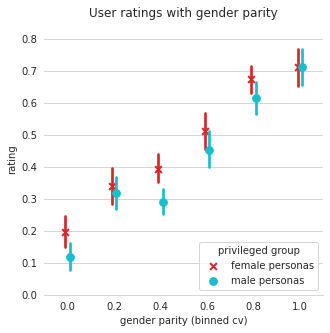

In [5]:
sns.set_style("whitegrid")

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['priviledged group'] = 'male personas'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['priviledged group'] = 'female personas'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='cv', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with gender parity')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

In [6]:
df_results = pd.DataFrame(columns=['cv','T','p-val'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results_ttest = pg.ttest(df_male[df_male.cv == i].rating, df_female[df_female.cv == i].rating)
    new_row = {'cv': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,T,p-val
cv,,
0.0,-1.997094,0.047943
0.2,-0.459694,0.646207
0.4,-2.781324,0.005737
0.6,-1.291857,0.197519
0.8,-1.461602,0.144855
1.0,0.000000,1.000000


### Adjusted accuracy in [0.8, 1] - Linewise Comparison

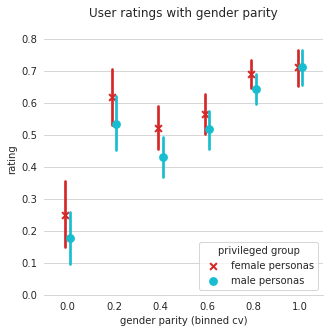

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
data = pd.concat([df_male, df_female])
g = sns.pointplot(data=data[data['question.adj_accuracy'] >= 0.8], ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='cv', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with gender parity')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

In [8]:
df_results = pd.DataFrame(columns=['cv','T','p-val'])
df_male2 = df_male[df_male['question.adj_accuracy'] >= 0.8]
df_female2 = df_female[df_female['question.adj_accuracy'] >= 0.8]
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results_ttest = pg.ttest(df_male2[df_male2.cv == i].rating, df_female2[df_female2.cv == i].rating)
    new_row = {'cv': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,T,p-val
cv,,
0.0,-0.898057,0.375408
0.2,-1.122821,0.264816
0.4,-1.651100,0.100622
0.6,-0.918449,0.359400
0.8,-1.200597,0.230872
1.0,0.000000,1.000000


### Adjusted accuracy in [0.6, 0.8)

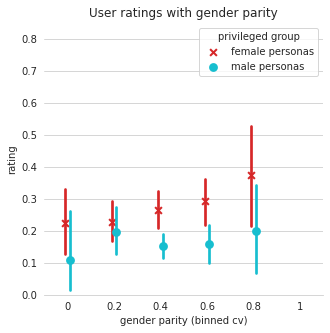

In [9]:
fig,ax = plt.subplots(figsize=(5,5))
data = pd.concat([df_male, df_female])
g = sns.pointplot(data=data[(data['question.adj_accuracy'] < 0.8) & (data['question.adj_accuracy'] >= 0.6)], ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='cv', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'], order=[0,.2,.4,.6,.8,1])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc='upper right', title='privileged group')
g.set_title('User ratings with gender parity')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

In [10]:
df_results = pd.DataFrame(columns=['cv','T','p-val'])
df_male2 = df_male[(df_male['question.adj_accuracy'] >= 0.6) & (df_male['question.adj_accuracy'] < 0.8)]
df_female2 = df_female[(df_female['question.adj_accuracy'] >= 0.6) & (df_female['question.adj_accuracy'] < 0.8)]
for i in [0, 0.2, 0.4, 0.6, 0.8]:
    results_ttest = pg.ttest(df_male2[df_male2.cv == i].rating, df_female2[df_female2.cv == i].rating)
    new_row = {'cv': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,T,p-val
cv,,
0.0,-1.095024,0.286094
0.2,-0.544202,0.588879
0.4,-2.656768,0.009184
0.6,-2.201310,0.032593
0.8,-1.218852,0.241449


### Adjusted accuracy in [0.4, 0.6)

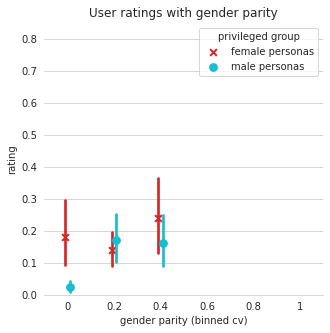

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
data = pd.concat([df_male, df_female])
g = sns.pointplot(data=data[(data['question.adj_accuracy'] < 0.6) & (data['question.adj_accuracy'] >= 0.4)], ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='cv', y='rating', join=False, palette=[red, cyan], markers=['x','o'],
                  hue_order=['female personas', 'male personas'], order=[0,.2,.4,.6,.8,1])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc='upper right', title='privileged group')
g.set_title('User ratings with gender parity')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

**Indeed**, people prefer unfair selections in which proportionally more women get selected over unfair selections that benefit men (see also heatmaps)

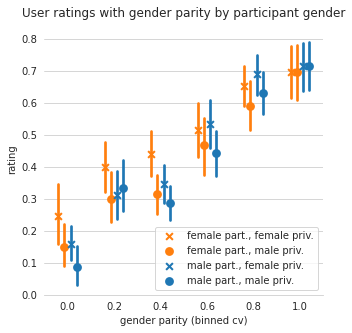

In [12]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

df_male = df_sel.query("`user.gender` != 'other'").copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'male part., male priv.'
df_male.loc[df['user.gender']=='female', 'type'] = 'female part., male priv.'
df_female = df_sel.query("`user.gender` != 'other'").copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'male part., female priv.'
df_female.loc[df['user.gender']=='female', 'type'] = 'female part., female priv.'

blue = sns.color_palette()[0]
orange = sns.color_palette()[1]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[orange, orange, blue, blue], markers=['x','o','x','o'],
                  hue_order = ['female part., female priv.', 'female part., male priv.',
                          'male part., female priv.', 'male part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by participant gender')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

In [13]:
df_results = pd.DataFrame(columns=['cv','group 1','T 1','p-val 1','group 2','T 2','p-val 2'])
df_male_male = df_male[df_male['user.gender'] == 'male']
df_male_female = df_female[df_female['user.gender'] == 'male']
df_female_male = df_male[df_male['user.gender'] == 'female']
df_female_female = df_female[df_female['user.gender'] == 'female']
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results1 = pg.ttest(df_male_male[df_male_male.cv == i].rating,
                        df_male_female[df_male_female.cv == i].rating)
    results2 = pg.ttest(df_female_male[df_female_male.cv == i].rating,
                        df_female_female[df_female_female.cv == i].rating)
    new_row = {'cv': i,
               'group 1': 'male part.',
               'T 1': results1['T']['T-test'],
               'p-val 1': results1['p-val']['T-test'],
               'group 2': 'female part.',
               'T 2': results2['T']['T-test'],
               'p-val 2': results2['p-val']['T-test'],
              }
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,group 1,T 1,p-val 1,group 2,T 2,p-val 2
cv,,,,,,
0.0,male part.,-1.394159,0.168522,female part.,-1.376442,0.175412
0.2,male part.,0.348433,0.728204,female part.,-1.389509,0.168069
0.4,male part.,-1.344505,0.180770,female part.,-2.247786,0.026044
0.6,male part.,-1.434199,0.153753,female part.,-0.651876,0.515869
0.8,male part.,-0.905972,0.366257,female part.,-1.011188,0.313940
1.0,male part.,0.000000,1.000000,female part.,0.000000,1.000000


**Indeed**, women prefer unfair selections in which proportionally more women get selected more so than men do (see also heatmaps)

# Majority-minority group parity

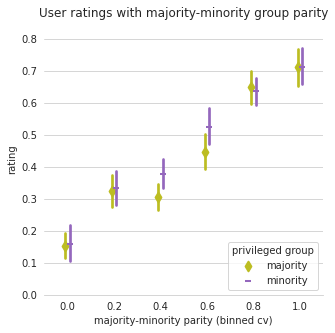

In [14]:
df_maj = df_sel.copy()
df_maj['cv'] = df['question.cat_cv']
df_maj['priviledged group'] = 'majority'
df_min = df_sel.copy()
df_min['cv'] = df['question.cat_inverse_cv']
df_min['priviledged group'] = 'minority'

yellow = sns.color_palette()[8]
purple = sns.color_palette()[4]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, hue='priviledged group', dodge=.1, ci=90,
                  x='cv', y='rating', join=False, palette=[yellow, purple], markers=['d','_'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with majority-minority group parity')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

In [15]:
df_results = pd.DataFrame(columns=['cv','T','p-val'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results_ttest = pg.ttest(df_maj[df_maj.cv == i].rating, df_min[df_min.cv == i].rating)
    new_row = {'cv': i, 'T': results_ttest['T']['T-test'], 'p-val': results_ttest['p-val']['T-test']}
    df_results = df_results.append(new_row, ignore_index=True)
df_results

,cv,T,p-val
0,0.0,-0.101512,0.919334
1,0.2,-0.223382,0.823456
2,0.4,-1.931003,0.054383
3,0.6,-1.678606,0.094407
4,0.8,0.311905,0.755341
5,1.0,0.000000,1.000000


**In fact**, people prefer unfair selections in which proportionally more of the minority get selected over unfair selections that benefit the majority

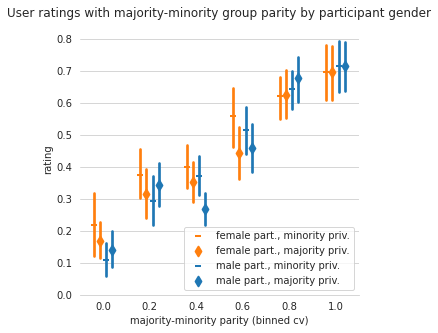

In [16]:
df_maj = df_sel.query("`user.gender` != 'other'").copy()
df_maj['cv'] = df['question.cat_cv']
df_maj['type'] = 'male part., majority priv.'
df_maj.loc[df['user.gender']=='female', 'type'] = 'female part., majority priv.'
df_min = df_sel.query("`user.gender` != 'other'").copy()
df_min['cv'] = df['question.cat_inverse_cv']
df_min['type'] = 'male part., minority priv.'
df_min.loc[df['user.gender']=='female', 'type'] = 'female part., minority priv.'

blue = sns.color_palette()[0]
orange = sns.color_palette()[1]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[orange, orange, blue, blue], markers=['_','d','_','d'],
                  hue_order = ['female part., minority priv.', 'female part., majority priv.',
                          'male part., minority priv.', 'male part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by participant gender')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

**In fact**, women prefer unfair selections in which proportionally more of the minority get selected more so than men do

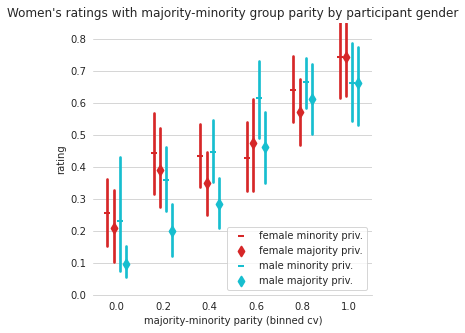

In [17]:
df_maj = df_sel.query("`user.gender` == 'female'").copy()
df_maj['cv'] = df['question.cat_gender_cv']
df_maj['type'] = 'male majority priv.'
df_maj.loc[df['question.majLabel']=='female', 'type'] = 'female majority priv.'
df_min = df_sel.query("`user.gender` == 'female'").copy()
df_min['cv'] = df['question.cat_inverse_gender_cv']
df_min['type'] = 'male minority priv.'
df_min.loc[df['question.majLabel']=='female', 'type'] = 'female minority priv.'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, cyan, cyan], markers=['_','d','_','d'],
                  hue_order = ['female minority priv.', 'female majority priv.',
                               'male minority priv.', 'male majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('Women\'s ratings with majority-minority group parity by participant gender')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

Compare (because the appear together):  
female minority - male majority  
male minority - female majority

Women mostly prefer the minority, even if it is a male minority (especially in 0, 0.6 and 0.8). Women rate male majorities in general worse than female majorities (except for 0.8).

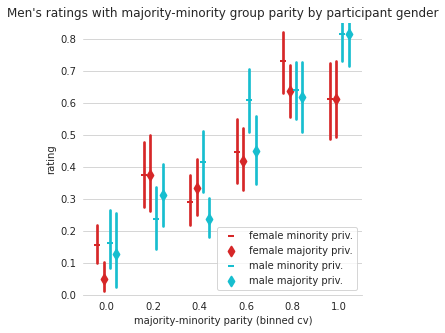

In [18]:
df_maj = df_sel.query("`user.gender` == 'male'").copy()
df_maj['cv'] = df['question.cat_gender_cv']
df_maj['type'] = 'male majority priv.'
df_maj.loc[df['question.majLabel']=='female', 'type'] = 'female majority priv.'
df_min = df_sel.query("`user.gender` == 'male'").copy()
df_min['cv'] = df['question.cat_inverse_gender_cv']
df_min['type'] = 'male minority priv.'
df_min.loc[df['question.majLabel']=='female', 'type'] = 'female minority priv.'

cyan = sns.color_palette()[9]
red = sns.color_palette()[3]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, cyan, cyan], markers=['_','d','_','d'],
                  hue_order = ['female minority priv.', 'female majority priv.',
                               'male minority priv.', 'male majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('Men\'s ratings with majority-minority group parity by participant gender')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

Compare (because the appear together):  
female minority - male majority  
male minority - female majority

Men also mostly prefer the minority (except for 0.2 & 1), but with smaller differences. Hence the overall strongest effect is women prefering female minorities over male majorities.

# Group Parity defined by Group Size or Gender

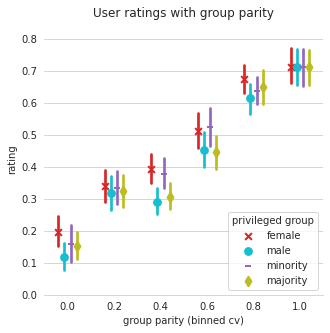

In [19]:
df_cv = df_sel.copy()
df_cv['cv'] = df['question.cat_cv']
df_cv['type'] = 'majority'
df_gender_cv = df_sel.copy()
df_gender_cv['cv'] = df['question.cat_gender_cv']
df_gender_cv['type'] = 'male'
df_inv_cv = df_sel.copy()
df_inv_cv['cv'] = df['question.cat_inverse_cv']
df_inv_cv['type'] = 'minority'
df_inv_gender_cv = df_sel.copy()
df_inv_gender_cv['cv'] = df['question.cat_inverse_gender_cv']
df_inv_gender_cv['type'] = 'female'

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_cv, df_gender_cv, df_inv_cv, df_inv_gender_cv]), ax=ax, color='tomato', dodge=.4,
                  x='cv', y='rating', hue='type', ci=90, join=False,
                  markers=['x','o','_','d'], palette=[red, cyan, purple, yellow],
                  hue_order=['female','male','minority','majority'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,.85))
ax.legend(loc=4, title='privileged group')
g.set_title('User ratings with group parity')
g.set(xlabel = 'group parity (binned cv)')
sns.despine(left=True)

In [20]:
df_results = pd.DataFrame(columns=['cv','group 1','T 1','p-val 1','group 2','T 2','p-val 2'])
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results1 = pg.ttest(df_gender_cv[df_gender_cv.cv == i].rating,
                        df_inv_gender_cv[df_inv_gender_cv.cv == i].rating)
    results2 = pg.ttest(df_cv[df_cv.cv == i].rating,
                        df_inv_cv[df_inv_cv.cv == i].rating)
    new_row = {'cv': i,
               'group 1': 'gender parity',
               'T 1': results1['T']['T-test'],
               'p-val 1': results1['p-val']['T-test'],
               'group 2': 'min-maj parity',
               'T 2': results2['T']['T-test'],
               'p-val 2': results2['p-val']['T-test'],
              }
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,group 1,T 1,p-val 1,group 2,T 2,p-val 2
cv,,,,,,
0.0,gender parity,-1.997094,0.047943,min-maj parity,-0.101512,0.919334
0.2,gender parity,-0.459694,0.646207,min-maj parity,-0.223382,0.823456
0.4,gender parity,-2.781324,0.005737,min-maj parity,-1.931003,0.054383
0.6,gender parity,-1.291857,0.197519,min-maj parity,-1.678606,0.094407
0.8,gender parity,-1.461602,0.144855,min-maj parity,0.311905,0.755341
1.0,gender parity,0.000000,1.000000,min-maj parity,0.000000,1.000000


The difference between female priv. and male priv. is generally bigger than minority priv. and majority priv. - gender is more of interest than group size.

# Group Parity by Age

splited groups at: 25.0


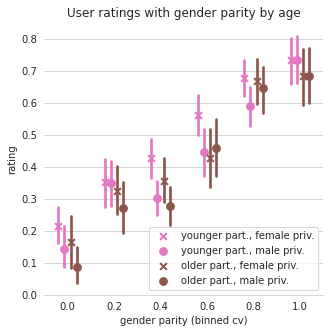

In [21]:
split_at = np.nanmedian(df_sel['user.age'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'younger part., male priv.'
df_male.loc[df['user.age']>split_at, 'type'] = 'older part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'younger part., female priv.'
df_female.loc[df['user.age']>split_at, 'type'] = 'older part., female priv.'

brown = sns.color_palette()[5]
pink = sns.color_palette()[6]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[pink, pink, brown, brown], markers=['x','o','x','o'],
                  hue_order = ['younger part., female priv.', 'younger part., male priv.',
                          'older part., female priv.', 'older part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by age')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

Younger participants prefer scenarios in which more women get selected more so than older participants do

splited groups at: 25.0


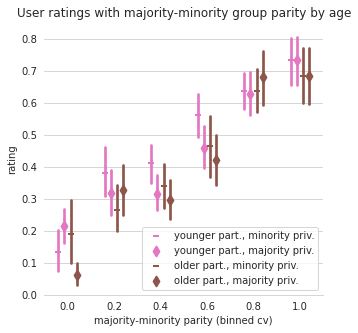

In [22]:
split_at = np.nanmedian(df_sel['user.age'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_cv']
df_male['type'] = 'younger part., majority priv.'
df_male.loc[df['user.age']>split_at, 'type'] = 'older part., majority priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_cv']
df_female['type'] = 'younger part., minority priv.'
df_female.loc[df['user.age']>split_at, 'type'] = 'older part., minority priv.'

brown = sns.color_palette()[5]
pink = sns.color_palette()[6]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[pink, pink, brown, brown], markers=['_','d','_','d'],
                  hue_order = ['younger part., minority priv.', 'younger part., majority priv.',
                          'older part., minority priv.', 'older part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by age')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

Younger participants prefer scenarios in which more personas of the minority gets selected more so than older participants do (except for 0).

# Group Parity by Religiousness

splited groups at: 0.08


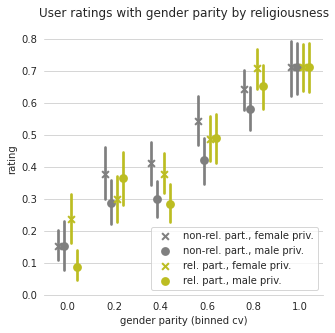

In [23]:
split_at = np.nanmedian(df_sel['user.religious'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'non-rel. part., male priv.'
df_male.loc[df['user.religious']>split_at, 'type'] = 'rel. part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'non-rel. part., female priv.'
df_female.loc[df['user.religious']>split_at, 'type'] = 'rel. part., female priv.'

gray = sns.color_palette()[7]
yellow = sns.color_palette()[8]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[gray, gray, yellow, yellow], markers=['x','o','x','o'],
                  hue_order = ['non-rel. part., female priv.', 'non-rel. part., male priv.',
                          'rel. part., female priv.', 'rel. part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by religiousness')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

More religious participants give a strong benefit to female personas in extreme scenarios, where almost only female personas get selected (at x=0). Less religious participants give stronger benefit to female personas in more moderate scenarios.

splited groups at: 0.08


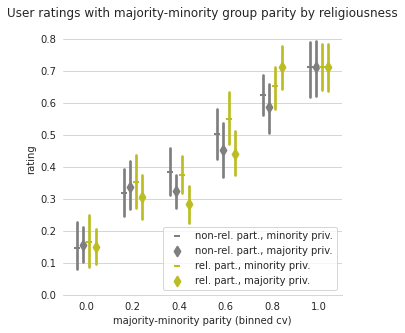

In [24]:
split_at = np.nanmedian(df_sel['user.religious'])
print('splited groups at:', split_at)

df_maj = df_sel.copy()
df_maj['cv'] = df['question.cat_cv']
df_maj['type'] = 'non-rel. part., majority priv.'
df_maj.loc[df['user.religious']>split_at, 'type'] = 'rel. part., majority priv.'
df_min = df_sel.copy()
df_min['cv'] = df['question.cat_inverse_cv']
df_min['type'] = 'non-rel. part., minority priv.'
df_min.loc[df['user.religious']>split_at, 'type'] = 'rel. part., minority priv.'

gray = sns.color_palette()[7]
yellow = sns.color_palette()[8]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[gray, gray, yellow, yellow], markers=['_','d','_','d'],
                  hue_order = ['non-rel. part., minority priv.', 'non-rel. part., majority priv.',
                          'rel. part., minority priv.', 'rel. part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by religiousness')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

People of any religiousness rate selections in which the majority / the minority are priviledged similarly.

# Group Parity by Political Orientation

splited groups at: 0.8


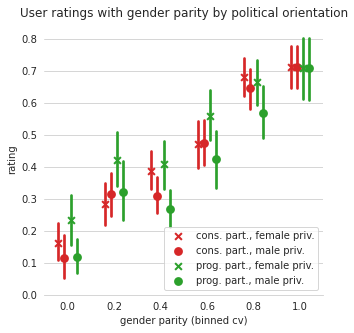

In [25]:
split_at = np.nanmedian(df_sel['user.political'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'cons. part., male priv.'
df_male.loc[df['user.political']>split_at, 'type'] = 'prog. part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'cons. part., female priv.'
df_female.loc[df['user.political']>split_at, 'type'] = 'prog. part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.4, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['x','o','x','o'],
                  hue_order = ['cons. part., female priv.', 'cons. part., male priv.',
                          'prog. part., female priv.', 'prog. part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by political orientation')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

In [26]:
df_results = pd.DataFrame(columns=['cv','group 1','T 1','p-val 1','group 2','T 2','p-val 2'])
df_cons_male = df_male[df_male['user.political'] <= split_at]
df_cons_female = df_female[df_female['user.political'] <= split_at]
df_prog_male = df_male[df_male['user.political'] > split_at]
df_prog_female = df_female[df_female['user.political'] > split_at]
for i in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    results1 = pg.ttest(df_cons_male[df_cons_male.cv == i].rating,
                        df_cons_female[df_cons_female.cv == i].rating)
    results2 = pg.ttest(df_prog_male[df_prog_male.cv == i].rating,
                        df_prog_female[df_prog_female.cv == i].rating)
    new_row = {'cv': i,
               'group 1': 'cons. part.',
               'T 1': results1['T']['T-test'],
               'p-val 1': results1['p-val']['T-test'],
               'group 2': 'prog. part.',
               'T 2': results2['T']['T-test'],
               'p-val 2': results2['p-val']['T-test'],
              }
    df_results = df_results.append(new_row, ignore_index=True)
df_results.set_index('cv')

,group 1,T 1,p-val 1,group 2,T 2,p-val 2
cv,,,,,,
0.0,cons. part.,-0.575347,0.567691,prog. part.,-1.990092,0.051725
0.2,cons. part.,0.664741,0.507538,prog. part.,-1.298545,0.197721
0.4,cons. part.,-1.826853,0.069318,prog. part.,-2.347122,0.020779
0.6,cons. part.,-0.252283,0.801207,prog. part.,-1.927750,0.056286
0.8,cons. part.,-0.882654,0.378693,prog. part.,-1.457705,0.147410
1.0,cons. part.,0.000000,1.000000,prog. part.,0.000000,1.000000


More progressive participants prefer scenarios in which more female personas get selected more so than more conservative participants do. More conservative participants rate scenarios in which female personas are priviledged in general similar to scenarios in which male personas are priviledged. Except for the most extreme cases (x=0), where even conservative participants give a bonus to female personas.

splited groups at: 0.8


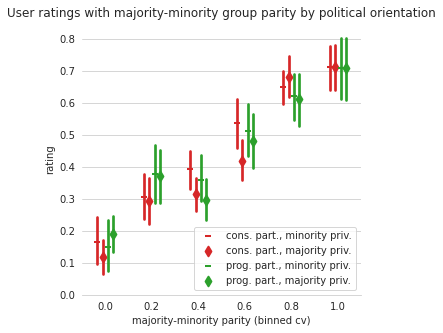

In [27]:
split_at = np.nanmedian(df_sel['user.political'])
print('splited groups at:', split_at)

df_maj = df_sel.copy()
df_maj['cv'] = df['question.cat_cv']
df_maj['type'] = 'cons. part., majority priv.'
df_maj.loc[df['user.political']>split_at, 'type'] = 'prog. part., majority priv.'
df_min = df_sel.copy()
df_min['cv'] = df['question.cat_inverse_cv']
df_min['type'] = 'cons. part., minority priv.'
df_min.loc[df['user.political']>split_at, 'type'] = 'prog. part., minority priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_maj, df_min]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['cons. part., minority priv.', 'cons. part., majority priv.',
                          'prog. part., minority priv.', 'prog. part., majority priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with majority-minority group parity by political orientation')
g.set(xlabel = 'majority-minority parity (binned cv)')
sns.despine(left=True)

More progressive participants **do not** prefer scenarios in which more personas of the minority get selected more so than more conservative participants do.

# Group Parity by Personality Traits

splited groups at: 3.5


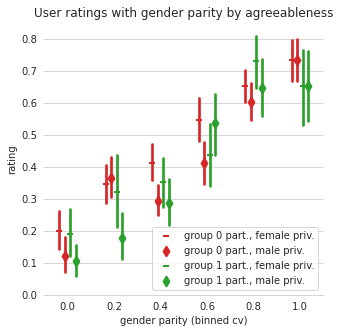

In [28]:
split_at = np.nanmedian(df_sel['user.agreeableness'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.agreeableness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.agreeableness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by agreeableness')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

splited groups at: 3.5


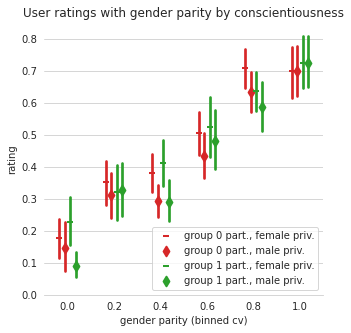

In [29]:
split_at = np.nanmedian(df_sel['user.conscientiousness'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.conscientiousness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.conscientiousness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by conscientiousness')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

splited groups at: 3.5


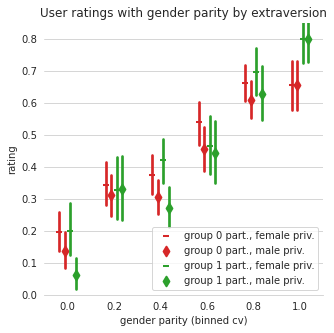

In [30]:
split_at = np.nanmedian(df_sel['user.extraversion'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.extraversion']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.extraversion']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by extraversion')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

splited groups at: 3.0


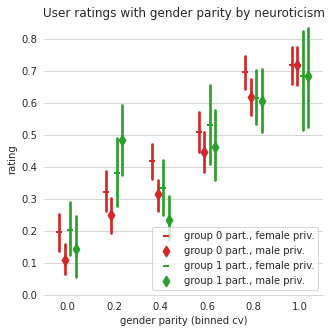

In [31]:
split_at = np.nanmedian(df_sel['user.neuroticism'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.neuroticism']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.neuroticism']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by neuroticism')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

splited groups at: 3.5


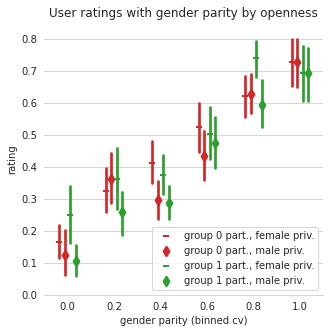

In [32]:
split_at = np.nanmedian(df_sel['user.openness'])
print('splited groups at:', split_at)

df_male = df_sel.copy()
df_male['cv'] = df['question.cat_gender_cv']
df_male['type'] = 'group 0 part., male priv.'
df_male.loc[df['user.openness']>split_at, 'type'] = 'group 1 part., male priv.'
df_female = df_sel.copy()
df_female['cv'] = df['question.cat_inverse_gender_cv']
df_female['type'] = 'group 0 part., female priv.'
df_female.loc[df['user.openness']>split_at, 'type'] = 'group 1 part., female priv.'

red = sns.color_palette()[3]
green = sns.color_palette()[2]

fig,ax = plt.subplots(figsize=(5,5))
g = sns.pointplot(data=pd.concat([df_male, df_female]), ax=ax, dodge=.35, ci=90,
                  x='cv', y='rating', hue='type', join=False,
                  palette=[red, red, green, green], markers=['_','d','_','d'],
                  hue_order = ['group 0 part., female priv.', 'group 0 part., male priv.',
                          'group 1 part., female priv.', 'group 1 part., male priv.'])
ax.set(xlim=(-0.5, 5.5), ylim=(0,0.85))
ax.legend(loc=4)
g.set_title('User ratings with gender parity by openness')
g.set(xlabel = 'gender parity (binned cv)')
sns.despine(left=True)

Personality traits seem to have no visible impact